# Unsupervised Learning - Project Submission

## Part A

Submission by: Keshav Kumar

<b>DOMAIN:</b> Automobile

<b>CONTEXT:</b> The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

<b>DATA DESCRIPTION:</b> 
- cylinders: multi-valued discrete
- acceleration: continuous
- displacement: continuous
- model year: multi-valued discrete
- horsepower: continuous
- origin: multi-valued discrete
- weight: continuous
- car name: string (unique for each instance)
- mpg: continuous

<b>PROJECT OBJECTIVE:</b> To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### <b> 1. Data Understanding and Exploration: </b>

In [2]:
df1 = pd.read_csv('Car name.csv')
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [4]:
df2 = pd.read_json ('Car-Attributes.json')
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:
df = pd.concat([df1,df2],axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


All columns have a count of 398, indicating there are 398 data points (cars) in the dataset.

Mean: 
- Average mpg is 23.5.
- Average number of cylinders is 5.5.
- Average engine displacement is around 193 cubic inches.
- Average car weight is close to 3000 pounds.
- Average acceleration time is around 15.6 seconds (assuming it represents 0-60 mph).
- Average model year is approximately 1976.
- Average origin value is 1.6, likely needing further investigation to understand the category mapping.

Standard Deviation: 
- Fuel efficiency has a standard deviation of nearly 8 mpg, suggesting some variation in car efficiency.
- There's a standard deviation of 1.7 cylinders, implying a mix of 4, 6, and 8-cylinder cars.
- Engine displacement also has a standard deviation of over 100 cubic inches.
- Car weight has a standard deviation of around 850 pounds.
- Acceleration time has a standard deviation of 2.7 seconds, suggesting some variation in car performance.
- Model year has a standard deviation of 3.7 years, indicating a range of car models from different eras.
- The standard deviation of origin is 0.8, which is low for a categorical variable, potentially signifying dominance of a specific origin category (needs mapping interpretation).

Min & Max values: 
- Fuel efficiency ranges from 9 mpg to nearly 47 mpg.
- The number of cylinders ranges from 3 to 8.
- Engine displacement varies from 68 to 455 cubic inches.
- Car weight ranges from 1613 to 5140 pounds.
- Acceleration time ranges from 8 to 24.8 seconds.
- Model year ranges from 1970 to 1982 (assuming the data reflects years).

50% (Median): 
- Median mpg is 23, suggesting that for half the cars, the fuel efficiency is lower than 23 mpg, and for the other half, it's higher.
- Median number of cylinders is 4, implying a potentially higher number of 4-cylinder cars compared to others.
- Median engine displacement is around 148.5 cubic inches, potentially indicating a prevalence of smaller or medium-sized engines.
- Median car weight is close to 2800 pounds.
- Median acceleration time is around 15.5 seconds.
- Median model year is 1976, aligning with the average year.

### <b> 2. Data Preparation & Analysis: </b>

In [9]:
missing_values = df.isnull().sum()
total_values = len(df)
percent_missing = (missing_values / total_values) * 100

print("Feature-wise percentage of missing values:")
print(percent_missing.to_string())

Feature-wise percentage of missing values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0


There are no missing values in the dataframe and hence no specific need to impute any values

In [10]:
duplicate = df.duplicated()
sum(duplicate)

0

There are no duplicates hence no specifc need to impute any values

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

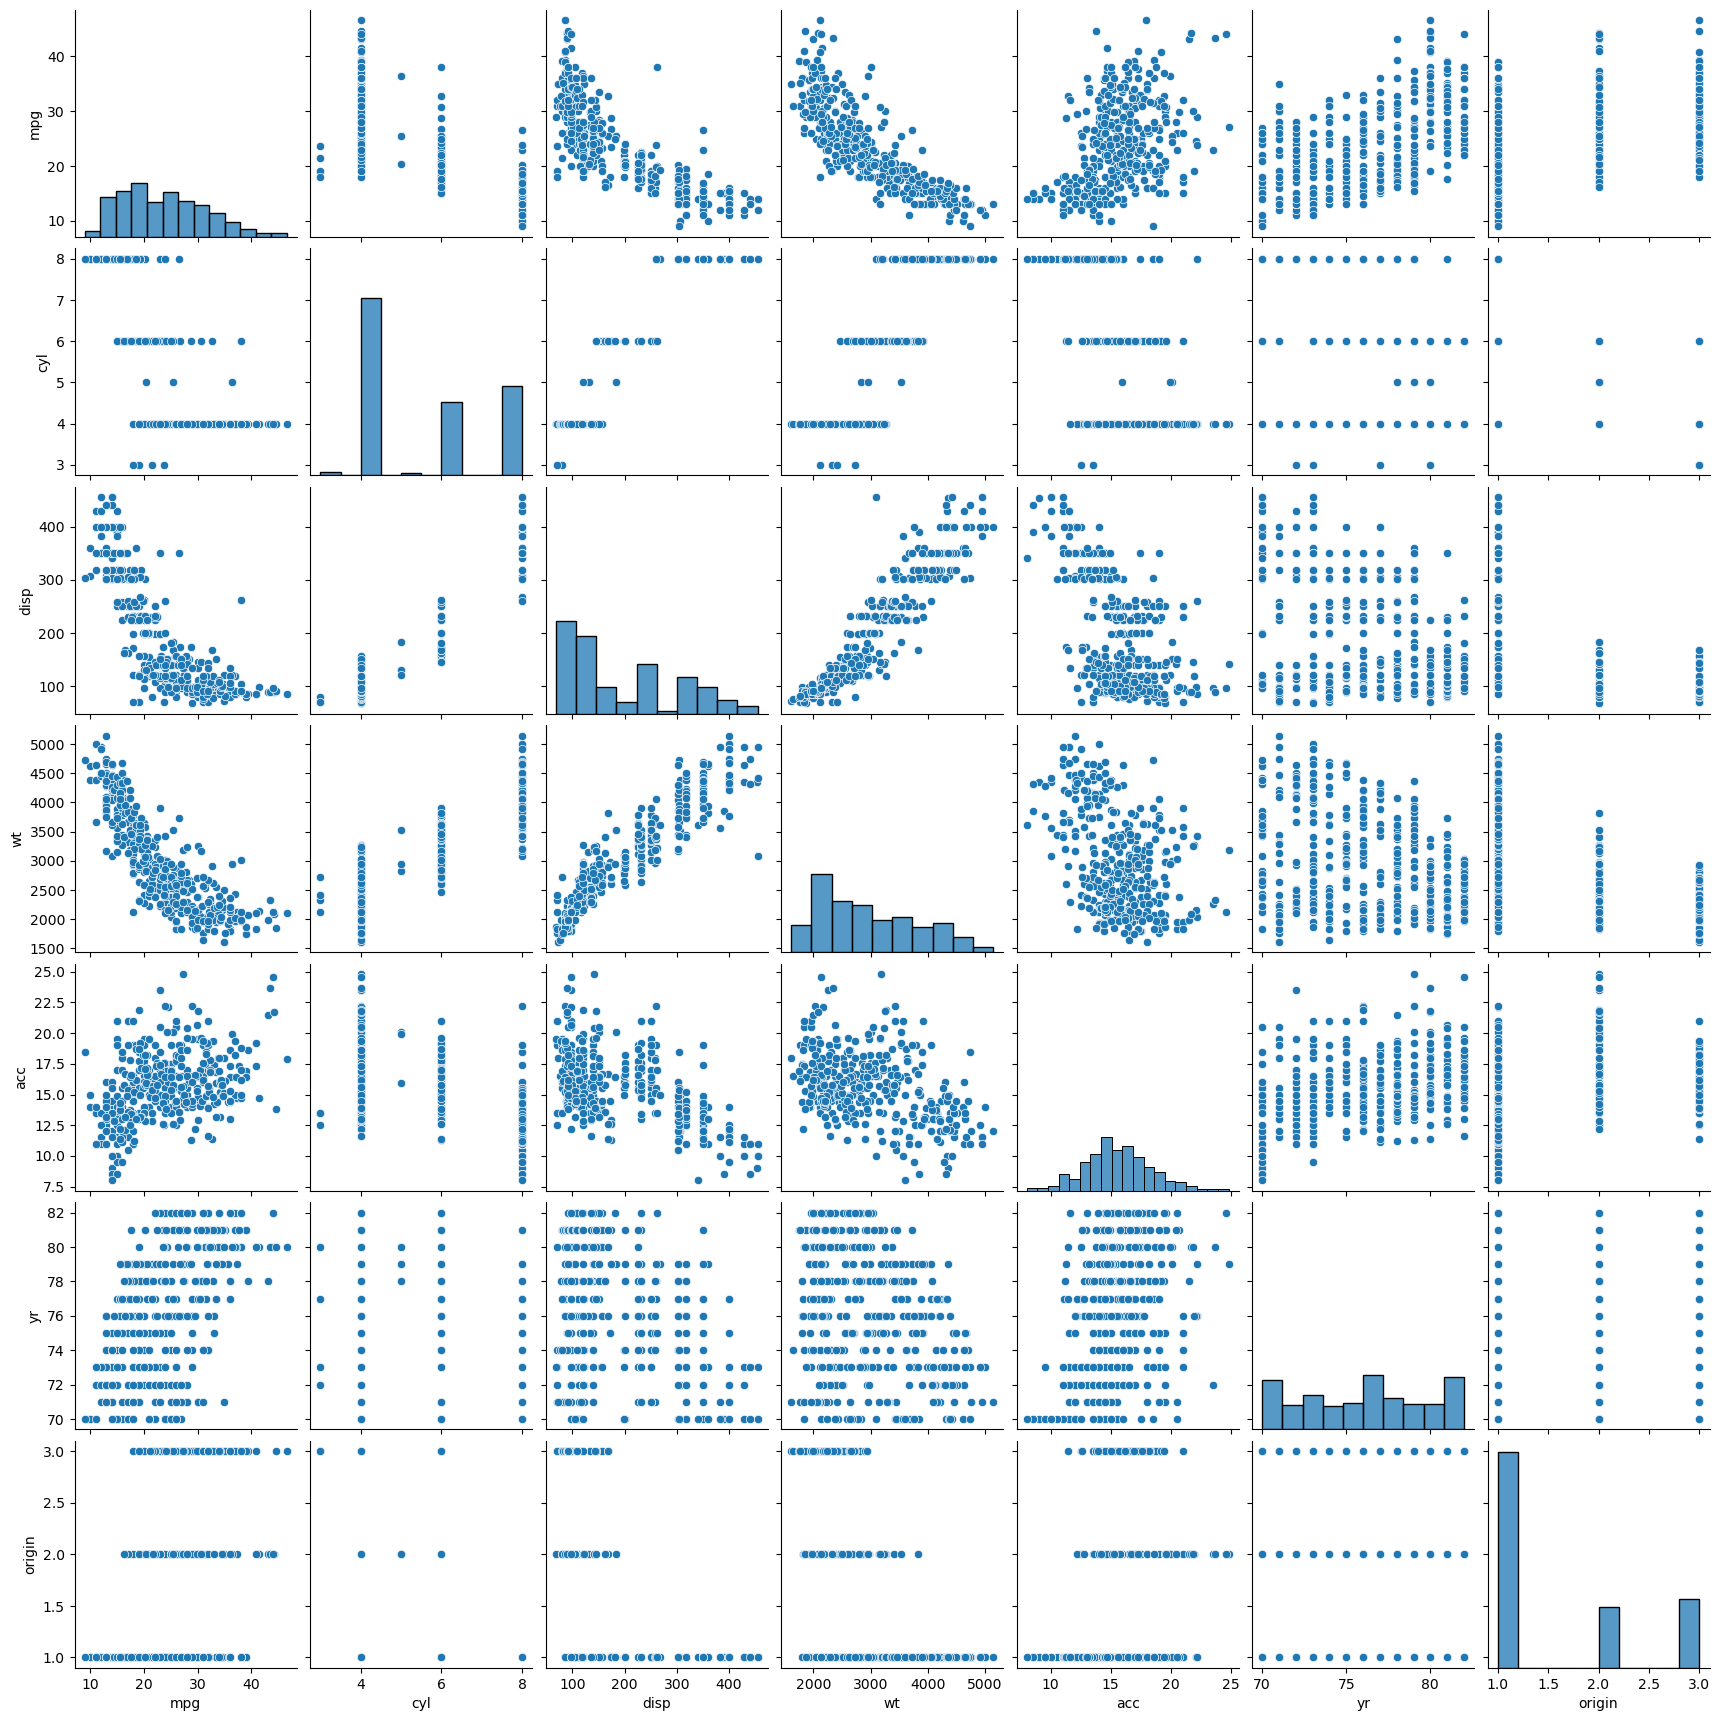

In [11]:
sns.pairplot(df)
plt.xticks(rotation=45)

Fuel Efficiency vs. Engine Displacement (mpg vs. disp):
- A positive correlation might suggest larger engines (higher displacement) have lower fuel efficiency (mpg).
- A negative correlation would indicate better fuel efficiency with larger engines, which is unlikely but might be due to technological advancements.
- No clear correlation would mean engine displacement has little impact on fuel efficiency within the data set.

Car Origin vs. Fuel Efficiency (origin vs. mpg):
- This could show differences in fuel efficiency between American, European, and Asian cars (assuming those are the origins).
- A cluster of points for each origin might reveal trends within each category.

Fuel Efficiency Over Time (year vs. mpg):
- An upward trend could indicate overall improvement in fuel efficiency over the years.
- A downward trend would suggest a decrease in fuel efficiency.
- No clear trend might imply fuel efficiency hasn't significantly changed over time.

Text(0, 0.5, 'Displacement')

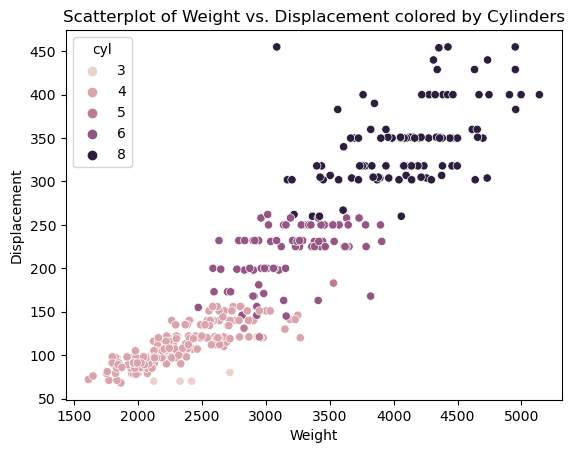

In [12]:
sns.scatterplot(x='wt', y='disp', hue='cyl', data=df)

plt.title('Scatterplot of Weight vs. Displacement colored by Cylinders')
plt.xlabel('Weight')
plt.ylabel('Displacement')

- There is a strong positive correlation between weight and displacement. This means that cars with a higher weight tend to have a higher displacement, and vice versa.  There is also a trend of increasing displacement and weight with more cylinders.
- Cars with 3 cylinders tend to have a lower displacement and weight than cars with 4 or more cylinders.
- There are a few outliers, which are data points that fall far away from the main trend. These outliers could represent cars with an unusually high or low weight for their displacement.
- It is important to note that correlation does not imply causation. Just because weight and displacement are positively correlated does not mean that weight causes displacement to increase, or vice versa. There could be another factor that causes both weight and displacement to increase.

Text(0, 0.5, 'Miles Per Gallon')

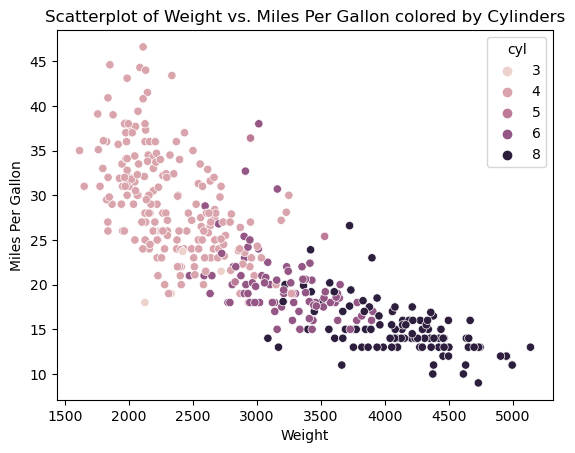

In [13]:
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=df)

plt.title('Scatterplot of Weight vs. Miles Per Gallon colored by Cylinders')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

- There is a negative correlation between weight and miles per gallon (mpg). This means that heavier cars (higher weight) tend to have lower fuel efficiency (mpg).
- Cars with more cylinders are generally heavier and have lower mpg. This is because cars with more cylinders typically have larger engines, which can contribute to both weight and lower fuel efficiency.
- It difficult to see a clear linear relationship between weight and mpg. This suggests other factors besides weight may influence mpg.

In [14]:
hp_unexpect = pd.DataFrame(df.hp.str.isdigit())
df[hp_unexpect['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [15]:
df = df.replace('?', np.nan)
df[hp_unexpect['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [16]:
df.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [17]:
df['hp'].fillna((df['hp'].median()), inplace=True)
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

Missing values are now imputed by the median for column 'hp'

### <b> 3. Clustering: </b>

Will first drop the column 'car_name'.

In [18]:
df = df.drop('car_name', axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [20]:
new_df = df.iloc[:,0:7]
new_df = new_df.apply(zscore)
new_df.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [21]:
k_means = KMeans(n_clusters = 2)
k_means.fit(new_df)
labels = k_means.labels_

In [22]:
silhouette_score(new_df,labels)

0.4823594610391611

Text(0, 0.5, 'Silhouette Coefficient')

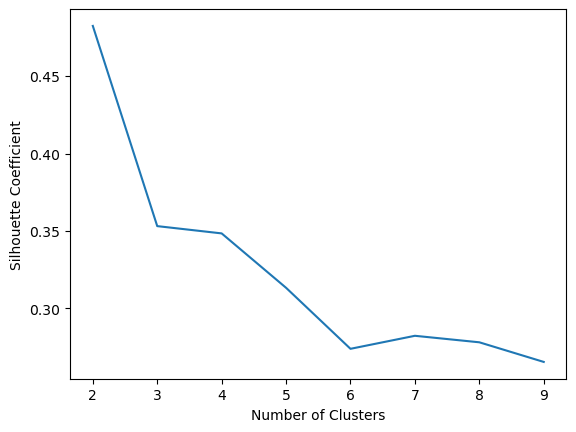

In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

silhouette_coefficients = []


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(new_df)
    score = silhouette_score(new_df,kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

The data above indicates that data can be most optimially separated in 2 clusters as it has the higher Silhoutte Coefficient of 0.48.

We will now also check this using the elbow method.

In [24]:
wcss =[]
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(new_df)
    wcss.append(KM.inertia_)

wcss

[2785.9999999999995, 1295.1229352629578, 946.0197908553793, 738.3743876111234]

Text(0, 0.5, 'WCSS')

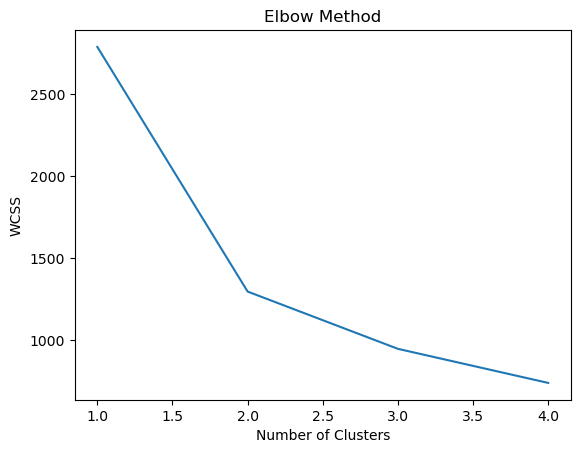

In [25]:
plt.plot(range(1,5), wcss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

- There is an elbow in the curve at 2 clusters after which the within-cluster-sum-of-square starts to show lesser reduction with addition of more clusters.
- In combination with the take away from Silhoutte Coefficient, the data will me most optimally segregated into 2 clusters.

In [26]:
k = 2

kmeans_model = KMeans(n_clusters=k)

kmeans_model.fit(new_df)

print("Cluster centers:")
print(kmeans_model.cluster_centers_)

Cluster centers:
[[ 0.39770388 -0.52082273 -0.51061703 -0.50406811 -0.47596996  0.35136805
   0.22000544]
 [-1.10978321  1.45334341  1.42486467  1.40659007  1.32818284 -0.98048418
  -0.61391994]]


In [27]:
new_df["cluster"] = labels
new_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1


A new feature has been added to the dataframe and this cluster is segregated into the values of 0 and 1.

<AxesSubplot:xlabel='mpg', ylabel='hp'>

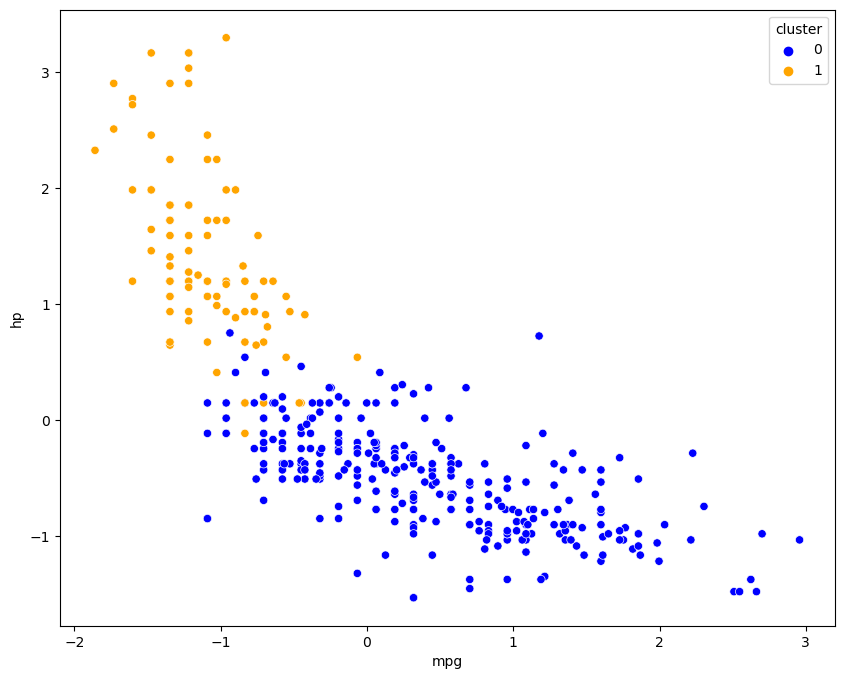

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster", data=new_df, palette=['blue','orange'])

In [29]:
new_data_point = [22, 4, 2.0, 140, 2.5, 15, 1970]  # mpg, cyl, disp, hp, wt, acc, yr

new_data_point_array = np.array([new_data_point])

prediction = kmeans_model.predict(new_data_point_array)

print("Predicted cluster for the new data point:", prediction[0])

Predicted cluster for the new data point: 0


In the above step, we have created a new datapoint using all the 7 features in the dataset and the model has predicted that it would be part of cluster 0.

## Part B

<b>DOMAIN:</b> Automobile

<b>CONTEXT:</b> The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

<b>DATA DESCRIPTION:</b> The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
- All the features are numeric i.e. geometric features extracted from the silhouette.

<b>PROJECT OBJECTIVE:</b> Apply dimensionality reduction technique – PCA and train a model and compare relative results.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### <b> 1. Data Understanding and Cleaning: </b>

In [31]:
df3 = pd.read_csv('vehicle.csv')
df3.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [33]:
missing_values = df3.isnull().sum()
total_values = len(df3)
percent_missing = (missing_values / total_values) * 100

print("Feature-wise percentage of missing values:")
print(percent_missing.to_string())

Feature-wise percentage of missing values:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000


Will drop the missing values from the dataframe

In [34]:
df3 = df3.dropna()

In [35]:
missing_values = df3.isnull().sum()
total_values = len(df3)
percent_missing = (missing_values / total_values) * 100

print("Feature-wise percentage of missing values:")
print(percent_missing.to_string())

Feature-wise percentage of missing values:
compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0


In [36]:
df3.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

We need to change the data type of variable 'class' to Category

In [37]:
df3['class']=df3['class'].astype('category')

In [38]:
df3.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

Text(0.5, 1.0, 'Pie Chart of Class Distribution')

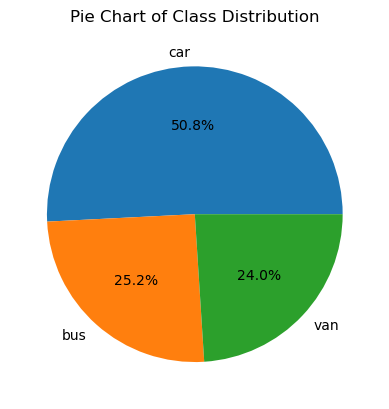

In [39]:
class_distribution = (df3['class'].value_counts() / len(df3)) * 100
plt.pie(class_distribution, labels=class_distribution.index, autopct="%1.1f%%")
plt.title("Pie Chart of Class Distribution")

In [40]:
duplicate = df3.duplicated()
sum(duplicate)

0

There are no duplicates hence no specifc need to impute any values

### <b> 2. Data Preparation: </b>

In [41]:
labelencoder_X = LabelEncoder()
df3['class'] = labelencoder_X.fit_transform(df3['class'])

In [42]:
X = df3.iloc[:,0:18]
y = df3.iloc[:,18]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [44]:
scaler = StandardScaler()

df3_scaled = scaler.fit_transform(df3)

Creating scaled train and test datasets

In [45]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(df3_scaled, y, test_size=0.3, random_state=10)

### <b> 3. Model Building: </b>

In [46]:
svc_base = SVC(C=0.025, kernel='rbf', gamma=3)
svc_base.fit(X_train_scaled, y_train)

prediction_test = svc_base.predict(X_test_scaled)
prediction_train = svc_base.predict(X_train_scaled)

In [47]:
print('Accuracy on Training Data',svc_base.score(X_train_scaled, y_train))
print('Accuracy on Testing Data',svc_base.score(X_test_scaled, y_test))

Accuracy on Training Data 0.5008787346221442
Accuracy on Testing Data 0.5245901639344263


Text(0.5, 1.0, 'Confusion Matrix for Test Data')

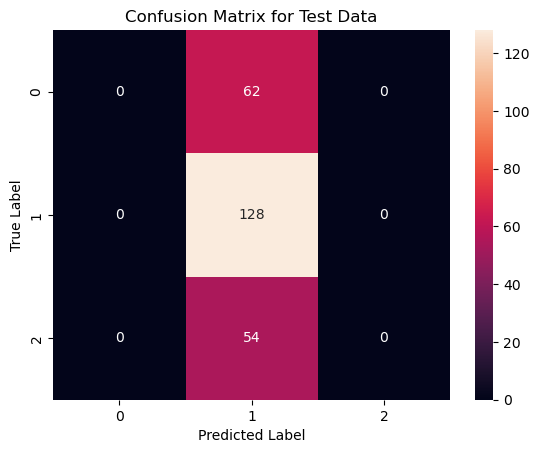

In [48]:
confusion_matrix_result = confusion_matrix(y_test, prediction_test)

sns.heatmap(confusion_matrix_result, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test Data")

In [49]:
print("\nClassification Report on training dataset:")
print(classification_report(y_train, prediction_train))

print("Classification Report on test dataset:")
print(classification_report(y_test, prediction_test))


Classification Report on training dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.50      1.00      0.67       285
           2       0.00      0.00      0.00       141

    accuracy                           0.50       569
   macro avg       0.17      0.33      0.22       569
weighted avg       0.25      0.50      0.33       569

Classification Report on test dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.52      1.00      0.69       128
           2       0.00      0.00      0.00        54

    accuracy                           0.52       244
   macro avg       0.17      0.33      0.23       244
weighted avg       0.28      0.52      0.36       244



**Class Imbalance:**
- The training dataset has a significantly higher number of samples in class 1 (285) compared to classes 0 (143) and 2 (141).
- This imbalance can lead to models prioritizing the majority class (class 1) during training.

**Overall Accuracy:**
- Both training and testing datasets have an accuracy around 50%. This is not necessarily a good indicator due to the class imbalance. A high accuracy can be misleading when one class dominates.

**Precision and Recall:**
- Class 0 has a precision and recall of 0 in both datasets, indicating the model almost never correctly predicts class 0.
- Class 1 has a much higher recall (1.00) in both datasets, meaning the model tends to classify most data points as class 1, even if they don't belong there (high false positives).

In [50]:
pca = PCA(n_components=10)

pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

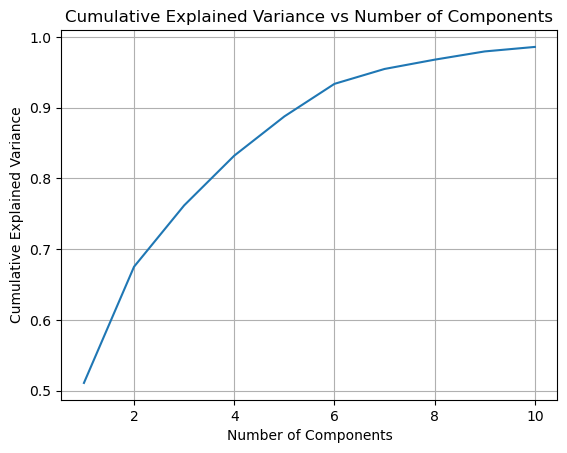

In [51]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs Number of Components")
plt.grid(True)

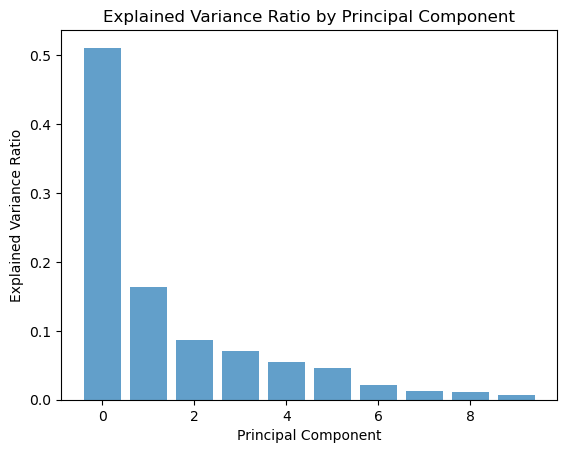

In [52]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.7)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component")
plt.show()

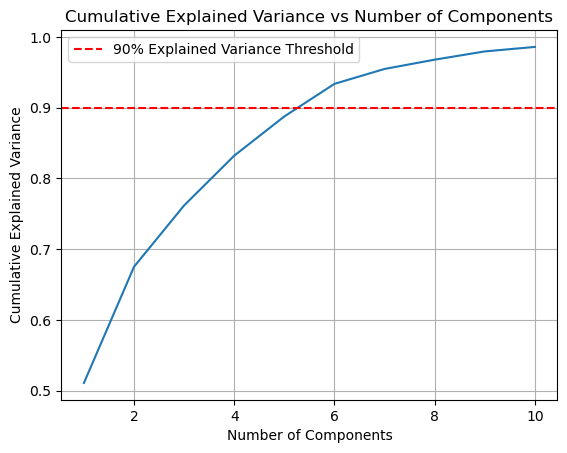

In [53]:
threshold = 0.9

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs Number of Components")
plt.grid(True)

plt.axhline(y=threshold, color='red', linestyle='--', label=f"{threshold*100:.0f}% Explained Variance Threshold")
plt.legend()

plt.show()

The chart above suggests that 6 components can explain 90% of variance in the data.

In [54]:
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.9) + 1

print(f"Minimum number of components for 90% explained variance: {num_components}")

Minimum number of components for 90% explained variance: 6


In [55]:
pca_optimized = PCA(n_components=6)

X_train_pca2 = pca_optimized.fit_transform(X_train_scaled)
X_test_pca2 = pca_optimized.transform(X_test_scaled)

In [56]:
svc_model = SVC(C=0.025, kernel='rbf', gamma=3)
svc_model.fit(X_train_pca2, y_train)

predictions_train = svc_model.predict(X_train_pca2)
predictions_test = svc_model.predict(X_test_pca2)

In [57]:
print("Classification Report (Training Data and 6 components):")
print(classification_report(y_train, predictions_train))

Classification Report (Training Data and 6 components):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.50      1.00      0.67       285
           2       0.00      0.00      0.00       141

    accuracy                           0.50       569
   macro avg       0.17      0.33      0.22       569
weighted avg       0.25      0.50      0.33       569



In [58]:
print("Classification Report (Test Data and 6 components):")
print(classification_report(y_test, predictions_test))

Classification Report (Test Data and 6 components):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.52      1.00      0.69       128
           2       0.00      0.00      0.00        54

    accuracy                           0.52       244
   macro avg       0.17      0.33      0.23       244
weighted avg       0.28      0.52      0.36       244



The  classification reports reveal that the model is struggling with class imbalance, especially for class 0, even after using Principal Component Analysis (PCA) for dimensionality reduction with 6 components. 

Class Imbalance:
- The training and testing datasets have significantly more samples in class 1 (285 and 128 respectively) compared to classes 0 (143 and 62) and 2 (141 and 54). This imbalance can lead to models prioritizing the majority class during training.

Overall Accuracy:
- Both datasets have accuracy around 50%. While seemingly reasonable, it's misleading due to the class imbalance. The model might simply predict the majority class (class 1) most of the time.

Precision and Recall:
- Class 0 has a precision and recall of 0 in both datasets, indicating the model almost never correctly predicts class 0.
- Class 1 has a high recall (1.00) in both datasets, meaning the model tends to classify most data points as class 1, even if they don't belong there (high false positives).

### <b> 4. Performance Improvement: </b>

We will first use Grid Search to identify the best paramameters 

In [59]:
svc_model_tuned = SVC()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'shrinking': [True, False],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=svc_model_tuned, param_grid=param_grid, cv=5)

grid_search.fit(X_train_pca2, y_train)

best_model = grid_search.best_estimator_

In [60]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf', 'shrinking': True}


We will now train a model using the best parameters

In [61]:
best_model.fit(X_train_pca2, y_train)

predictions_train2 = best_model.predict(X_train_pca2)
predictions_test2 = best_model.predict(X_test_pca2)

In [62]:
# Print classification report for training data
print("Classification Report (Training Data):")
print(classification_report(y_train, predictions_train2))

# Print classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, predictions_test2))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       141

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00        54

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



These classification reports indicate a very good performance on both the training and testing datasets. 

Overall Accuracy: Both reports show an accuracy of 1.00, which means the model perfectly classified all data points in both datasets.

Precision, Recall, and F1-score: All classes (0, 1, and 2) have a precision, recall, and F1-score of 1.00. 

- For each class, the model only predicted positive cases (class labels) that were truly positive. There are no false positives.
- The model identified all positive cases (class labels) correctly. There are no false negatives.

These results suggest that the model has learned to perfectly distinguish between the three classes in both the training and testing data. 

Since the datasets were not too large, it is not surprising that we achieved perfect accuracy. 

However, this might lead to overfitting and potentially poor performance on unseen data.

Overall, these reports show a promising start, but further evaluation with a larger dataset and additional metrics might be necessary to assess the model's generalizability and robustness.

### <b> 5. Data Understanding & Conclusion: </b>

**Prerequisites:**

* **Numeric Data:** PCA works best with numerical data. If your data contains categorical features, you might need to encode them numerically before applying PCA.
* **Centered Data:** PCA assumes the data is centered around the mean for each feature. In simpler terms, each feature should have a mean of zero. Most PCA implementations handle centering automatically.

**Assumptions:**

* **Linear Relationships:** PCA captures linear relationships between features. If the relationships between your features are highly non-linear, PCA might not be the most effective dimensionality reduction technique.
* **Gaussian Distribution (Optional):** While not strictly necessary, PCA often performs better when the data for each feature is approximately normally distributed (bell-shaped curve).

**Advantages of PCA:**

* **Dimensionality Reduction:** PCA reduces the number of features in your data, which can be beneficial for:
    * **Visualization:** Lower-dimensional data is easier to visualize with techniques like scatter plots.
    * **Computational Efficiency:** Machine learning algorithms often perform faster and can potentially avoid the curse of dimensionality with fewer features.
    * **Reduced Overfitting:** Fewer features can help prevent models from overfitting to the training data. 
* **Noise Reduction:** PCA focuses on capturing the variance in the data, which can help remove noise or irrelevant information.
* **Interpretability:** The principal components (PCs) generated by PCA can sometimes be linked back to the original features, providing insights into the underlying structure of the data.

**Limitations of PCA:**

* **Information Loss:** By reducing dimensionality, PCA discards some information from the original data. The challenge is to retain the most important information.
* **Assumes Linear Relationships:** PCA is limited in its ability to capture non-linear relationships between features. If your data has significant non-linear patterns, PCA might not be the best choice.
* **Interpretability (Limited):** While sometimes interpretable, principal components are often linear combinations of the original features, making their interpretation less straightforward compared to the original features.
* **Choice of Components:** Determining the optimal number of principal components to retain can be challenging. Too few components might lose important information, while too many might reintroduce noise.

## End Of Project